In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import re

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = "/content/drive/MyDrive/Freelance/Data Science/Sexual-Knowledge-Attitudes-and-Behaviors-among-Young-Adults-in-Cagayan-De-Oro-City-Responses/dataset.csv"
data = pd.read_csv(path)

#Dataset is now stored in a Pandas Dataframe
data
# data.columns

,Age,Gender,Student,Employed,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,22,0,1,0,1,0,1,0,0,1,1,1,1,0,0
1,19,0,1,0,0,1,1,0,1,1,1,0,0,1,0
2,19,1,1,0,0,1,1,0,0,1,1,1,0,1,0
3,21,0,1,0,1,0,1,1,0,1,1,0,1,0,1
4,21,0,1,0,0,0,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,23,0,0,1,1,0,1,0,1,1,1,0,1,0,0
199,23,0,0,1,1,1,1,0,1,1,1,0,1,1,0
200,24,1,1,1,1,1,1,0,0,1,1,0,1,0,0
201,24,1,0,1,1,0,1,0,1,1,1,0,1,0,0


In [10]:
data.sample(5)

,Age,Gender,Student,Employed,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
83,21,0,1,0,1,0,1,1,1,1,1,1,1,1,1
153,25,1,0,1,0,0,1,1,0,1,1,1,1,0,0
5,21,1,1,0,0,0,1,1,1,1,1,0,0,0,1
9,22,1,1,0,0,0,1,1,1,1,0,1,1,0,0
40,22,0,1,0,1,1,1,0,0,1,1,0,1,0,0


In [11]:
data.shape

(203, 15)

In [12]:
data.dtypes

Age         int64
Gender      int64
Student     int64
Employed    int64
Q1          int64
Q2          int64
Q3          int64
Q4          int64
Q5          int64
Q6          int64
Q7          int64
Q8          int64
Q9          int64
Q10         int64
Q11         int64
dtype: object

In [13]:
pd.set_option('precision', 2) 
print(data.describe())

          Age  Gender  Student  Employed      Q1      Q2      Q3      Q4  \
count  203.00  203.00   203.00    203.00  203.00  203.00  203.00  203.00   
mean    22.42    0.37     0.55      0.40    0.63    0.13    0.75    0.33   
std      1.86    0.48     0.50      0.49    0.49    0.34    0.43    0.47   
min     17.00    0.00     0.00      0.00    0.00    0.00    0.00    0.00   
25%     21.00    0.00     0.00      0.00    0.00    0.00    0.50    0.00   
50%     22.00    0.00     1.00      0.00    1.00    0.00    1.00    0.00   
75%     24.00    1.00     1.00      1.00    1.00    0.00    1.00    1.00   
max     29.00    1.00     1.00      1.00    1.00    1.00    1.00    1.00   

           Q5      Q6      Q7      Q8      Q9     Q10     Q11  
count  203.00  203.00  203.00  203.00  203.00  203.00  203.00  
mean     0.55    0.88    0.94    0.33    0.71    0.33    0.51  
std      0.50    0.32    0.25    0.47    0.45    0.47    0.50  
min      0.00    0.00    0.00    0.00    0.00    0.00    0.

##**Age of Respondents**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


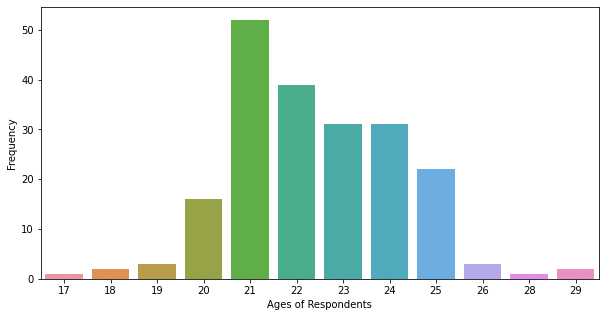

In [14]:
respondent_ages = data['Age'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(respondent_ages.index, respondent_ages.values)
plt.xlabel('Ages of Respondents')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


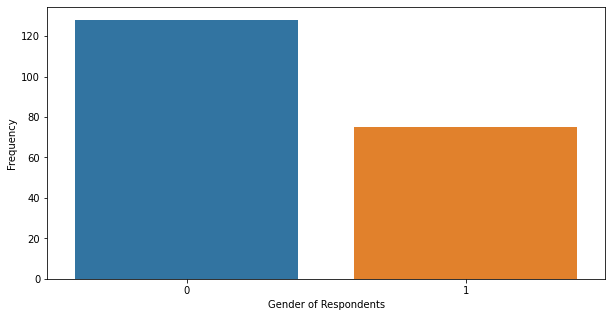

In [15]:
respondent_gender = data['Gender'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(respondent_gender.index, respondent_gender.values)
plt.xlabel('Gender of Respondents')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


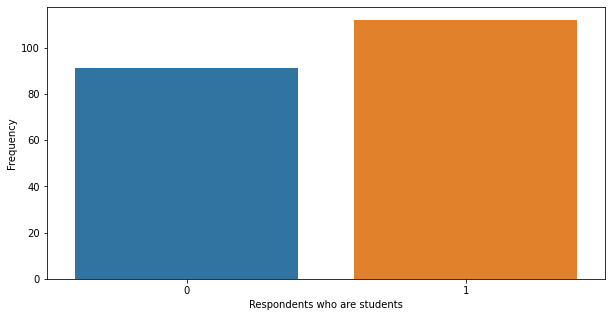

In [17]:
respondent_is_student = data['Student'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(respondent_is_student.index, respondent_is_student.values)
plt.xlabel('Respondents who are students')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


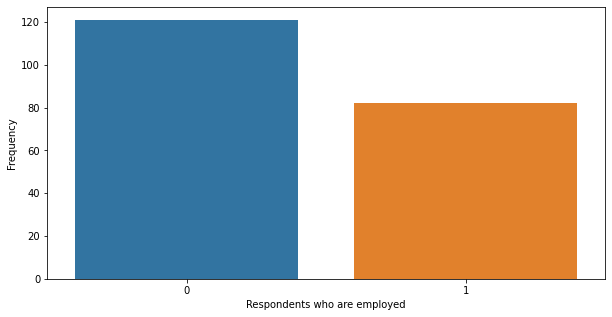

In [19]:
respondent_is_employed = data['Employed'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(respondent_is_employed.index, respondent_is_employed.values)
plt.xlabel('Respondents who are employed')
plt.ylabel('Frequency')
plt.show()

# **Barplot below shows the respondents' answers to the questions**
### **The individual bar plot of Q1 is shown as a guide**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


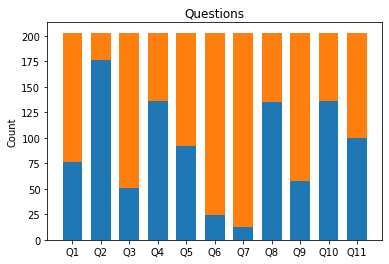

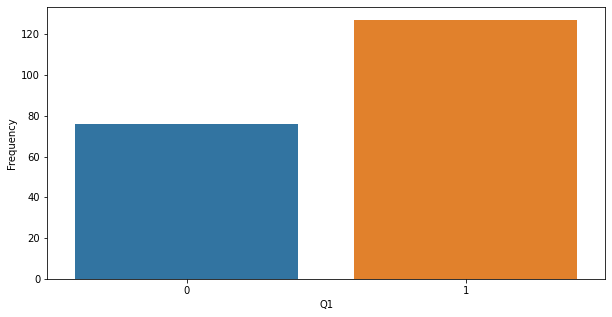

In [76]:
N = 11
but = (data['Q1'].value_counts()[0], data['Q2'].value_counts()[0], data['Q3'].value_counts()[0], data['Q4'].value_counts()[0], data['Q5'].value_counts()[0], data['Q6'].value_counts()[0], data['Q7'].value_counts()[0], data['Q8'].value_counts()[0], data['Q9'].value_counts()[0], data['Q10'].value_counts()[0], data['Q11'].value_counts()[0])
top = (data['Q1'].value_counts()[1], data['Q2'].value_counts()[1], data['Q3'].value_counts()[1], data['Q4'].value_counts()[1], data['Q5'].value_counts()[1], data['Q6'].value_counts()[1], data['Q7'].value_counts()[1], data['Q8'].value_counts()[1], data['Q9'].value_counts()[1], data['Q10'].value_counts()[1], data['Q11'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, but, width)
p2 = plt.bar(ind, top, width, bottom=but)

plt.ylabel('Count')
plt.title('Questions')
plt.xticks(ind, ('Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10', 'Q11',))

q1 = data['Q1'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q1.index, q1.values)
plt.xlabel('Q1')
plt.ylabel('Frequency')
plt.show()

# Read the Pearson Correlation Matrix below similar to a multiplication table


1.   ### **A Pearson r of 1 can be observed diagonally, this is because a variable is perfectly correlated to itself**
2.   ### **A Pearson r value of 1 means perfect correlation while 0 means no correlation**
3. ### **A negative Pearson r value means the 2 variables are indirectly proportional**

#**Weak positive correlation would be in the range of 0.1 to 0.3, moderate positive correlation from 0.3 to 0.5, and strong positive correlation from 0.5 to 1.0**


##**Observe Age and Employed:**
The Pearson r between these 2 variables had the highest value at 0.63. This means that older respondents tend to employed. Which is true since the legal age to get a job is 18.
#### **Also see Employed and Student**


##**Observe Question 6 and Question 7:**
#####Q6: Condoms are an effective way of protecting against sexually transmitted diseases
#####Q6: Male condoms can be used more than once

It can be said that respondents that are knowledgeable that condoms are an effective way of protecting against sexually transmitted diseases may also be knowledgeable that male condoms cannot be used more than once.

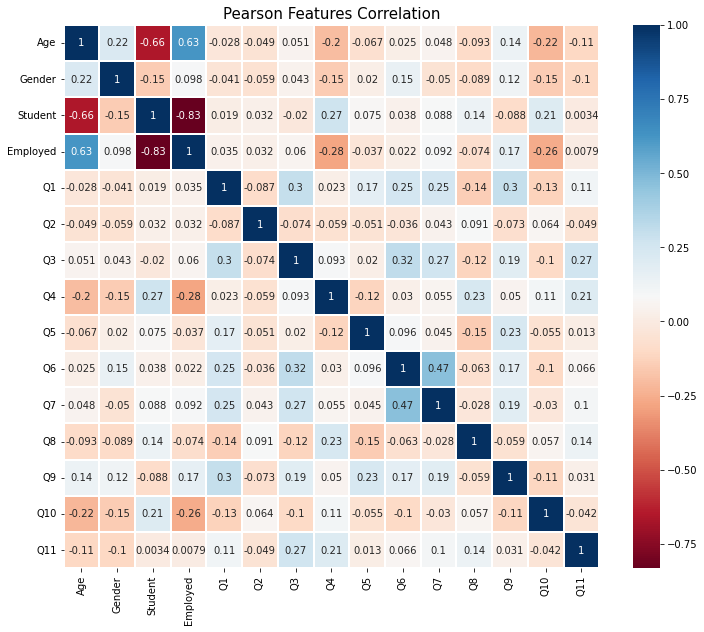

In [78]:
cmap = plt.cm.RdBu
corr = data[['Age', 'Gender', 'Student', 'Employed', 'Q1', 'Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10', 'Q11']].corr()
plt.figure(figsize=(12,10))
plt.title('Pearson Features Correlation', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

In [77]:
data

,Age,Gender,Student,Employed,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,22,0,1,0,1,0,1,0,0,1,1,1,1,0,0
1,19,0,1,0,0,1,1,0,1,1,1,0,0,1,0
2,19,1,1,0,0,1,1,0,0,1,1,1,0,1,0
3,21,0,1,0,1,0,1,1,0,1,1,0,1,0,1
4,21,0,1,0,0,0,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,23,0,0,1,1,0,1,0,1,1,1,0,1,0,0
199,23,0,0,1,1,1,1,0,1,1,1,0,1,1,0
200,24,1,1,1,1,1,1,0,0,1,1,0,1,0,0
201,24,1,0,1,1,0,1,0,1,1,1,0,1,0,0


In [ ]:
q1 = data['Q1'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q1.index, q1.values)
plt.xlabel('Q1')
plt.ylabel('Frequency')
plt.show()

q2 = data['Q2'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q2.index, q2.values)
plt.xlabel('Q2')
plt.ylabel('Frequency')
plt.show()

q3 = data['Q3'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q3.index, q3.values)
plt.xlabel('Q3')
plt.ylabel('Frequency')
plt.show()

q4 = data['Q4'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q4.index, q4.values)
plt.xlabel('Q4')
plt.ylabel('Frequency')
plt.show()

q5 = data['Q5'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q5.index, q5.values)
plt.xlabel('Q5')
plt.ylabel('Frequency')
plt.show()

q6 = data['Q6'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q6.index, q6.values)
plt.xlabel('Q6')
plt.ylabel('Frequency')
plt.show()

q7 = data['Q7'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q7.index, q7.values)
plt.xlabel('Q7')
plt.ylabel('Frequency')
plt.show()

q8 = data['Q8'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q8.index, q8.values)
plt.xlabel('Q8')
plt.ylabel('Frequency')
plt.show()

q9 = data['Q9'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q9.index, q9.values)
plt.xlabel('Q9')
plt.ylabel('Frequency')
plt.show()

q10 = data['Q10'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q10.index, q10.values)
plt.xlabel('Q10')
plt.ylabel('Frequency')
plt.show()

q11 = data['Q11'].value_counts()
plt.figure(figsize = (10, 5))
sns.barplot(q11.index, q11.values)
plt.xlabel('Q11')
plt.ylabel('Frequency')
plt.show()